<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Neural Networks for Recognition - Assignment 3

     Instructor: Kris Kitani                       TAs: Qichen(Lead), Paritosh, Rawal, Yan, Zen, Wen-Hsuan

## Q3 Training Models (20 points)

**Please include all the write up answers below to theory.ipynb. For the questions need code, you need to include the screenshot of code to theory.ipynb to get points.**


First, be sure to run the script, from inside the scripts folder, `get_data.sh`. This will use `wget` and `unzip` to download 

http://www.cs.cmu.edu/~lkeselma/16720a_data/data.zip


http://www.cs.cmu.edu/~lkeselma/16720a_data/images.zip

and extract them to **data** and **image** folders


Since our input images are $32\times 32$ images, unrolled into one 1024 dimensional vector, that gets multiplied by $\textbf{W}^{(1)}$, each row of $\textbf{W}^{(1)}$ can be seen as a weight image. Reshaping each row into a $32\times 32$ image can give us an idea of what types of images each unit in the hidden layer has a high response to.

We have provided you three data **.mat** files to use for this section. The training data in **nist36\_train.mat** contains samples for each of the 26 upper-case letters of the alphabet and the 10 digits. This is the set you should use for training your network. The cross-validation set in **nist36\_valid.mat** contains samples from each class, and should be used in the training loop to see how the network is performing on data that it is not training on. This will help to spot over fitting. Finally, the test data in **nist36\_test.mat** contains testing data, and should be used for the final evaluation on your best model to see how well it will generalize to new unseen data.

### Q3.1 (8 points Autograder)
Train a network from scratch. Use a single hidden layer with 64 hidden units, and train for at least 30 epochs. **Modify** the script to generate two plots: one showing the accuracy on both the training and validation set over the epochs, and the other showing the cross-entropy loss averaged over the data. The x-axis should represent the epoch number, while the y-axis represents the accuracy or loss. With these settings, you should see an accuracy on the validation set of at least 75\%.

In [2]:
import numpy as np
import scipy.io
from ipynb.fs.defs.q2 import *

Batch size 25, learning rate 0.006
itr: 00 	 loss: 33145.59 	 acc : 0.21
itr: 14 	 loss: 8092.18 	 acc : 0.79
itr: 28 	 loss: 5372.83 	 acc : 0.86
Validation loss, accuracy: 3053.9407204811114, 0.7505555555555555


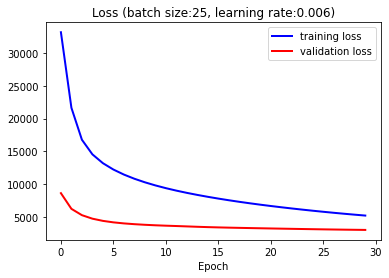

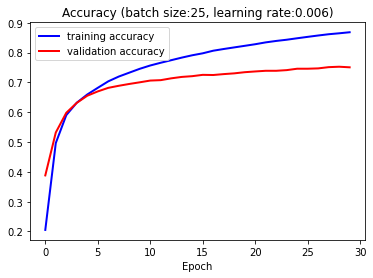

In [3]:
train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

max_iters = 30
hidden_size = 64
# pick a batch size, learning rate

# for batch_size in (5, 10, 25, 40, 70, 100, 300):
#     for learning_rate in (1e-1, 5e-2, 1e-2, 5e-3, 1e-3):
for batch_size in (25, ):
    for learning_rate in (6e-3, ):
        print(f"Batch size {batch_size}, learning rate {learning_rate}")

        batches = get_random_batches(train_x, train_y, batch_size)
        num_batches = len(batches)

        params = {}

        # initialize layers (named "layer1" and "output") here
        # YOUR CODE HERE
        initialize_weights(in_size=train_x.shape[1],
                           out_size=hidden_size,
                           params=params,
                           name="layer1")
        initialize_weights(in_size=hidden_size,
                           out_size=train_y.shape[1],
                           params=params,
                           name="output")

        # with default settings, you should get loss < 150 and accuracy > 80%
        t_losses = []
        t_accuracies = []
        v_losses = []
        v_accuracies = []
        for itr in range(max_iters):
            total_loss = 0
            total_acc = 0
            for i, (xb, yb) in enumerate(batches):

                # training loop can be exactly the same as q2!
                # YOUR CODE HERE
                total_loss, total_acc = network_step(
                    x_batch=xb,
                    y_batch=yb,
                    params=params,
                    total_loss=total_loss,
                    avg_acc=total_acc,
                    learning_rate=learning_rate,
                    len_x_full=train_x.shape[0],
                )
                # if i % 10 == 0:
                #     print(f"Epoch {itr+1:02d}, Batch {i+1:03d}/{num_batches}")

            t_losses.append(total_loss)
            t_accuracies.append(total_acc)

            valid_hidden = forward(X=valid_x, params=params, name='layer1', activation=sigmoid)
            valid_probs = forward(X=valid_hidden, params=params, name='output', activation=softmax)
            valid_loss, valid_acc = compute_loss_and_acc(valid_y, valid_probs)

            v_losses.append(valid_loss)
            v_accuracies.append(valid_acc)

            if itr % 14 == 0:
                print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr, total_loss, total_acc))

        # run on validation set and report accuracy! should be above 75%
        # YOUR CODE HERE

        print(f'Validation loss, accuracy: {v_losses[-1]}, {v_accuracies[-1]}')

        from matplotlib import pyplot
        pyplot.plot(t_losses, "b", lw=2, label="training loss")
        pyplot.plot(v_losses, "r", lw=2, label="validation loss")
        pyplot.xlabel("Epoch")
        pyplot.title(f"Loss (batch size:{batch_size}, learning rate:{learning_rate})")
        pyplot.legend()
        pyplot.show()

        pyplot.plot(t_accuracies, "b", lw=2, label="training accuracy")
        pyplot.plot(v_accuracies, "r", lw=2, label="validation accuracy")
        pyplot.xlabel("Epoch")
        pyplot.title(f"Accuracy (batch size:{batch_size}, learning rate:{learning_rate})")
        pyplot.legend()
        pyplot.show()

In [5]:
# Save the parameters (when deemed appropriate)
import pickle
pickle.dump(params, open( "q3_weights.pickle", "wb" ) )

In [ ]:
assert 'Wlayer1' in params
assert 'Woutput' in params


### Q3.2 (3 points Code+WriteUp)
Use your modified training script to train three networks, one with your best learning rate, one with 10 times that learning rate and one with one tenth that learning rate. Include all 6 plots in your writeup. Comment on how the learning rates affect the training, and report the final accuracy of the best network on the test set.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

Batch size 25, learning rate 0.06
itr: 00 	 loss: 39724.57 	 acc : 0.03
itr: 14 	 loss: 33764.37 	 acc : 0.09
itr: 28 	 loss: 26124.22 	 acc : 0.27
Validation loss, accuracy: 8498.858406329091, 0.26916666666666667


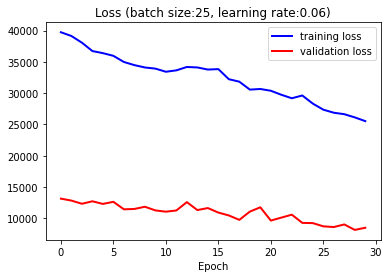

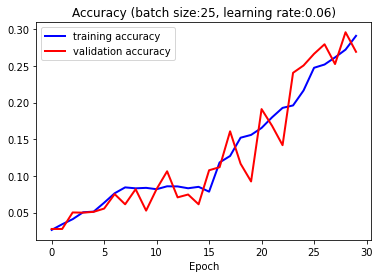

Batch size 25, learning rate 0.006
itr: 00 	 loss: 33683.22 	 acc : 0.19
itr: 14 	 loss: 8029.96 	 acc : 0.80
itr: 28 	 loss: 5376.20 	 acc : 0.86
Validation loss, accuracy: 3034.067423521253, 0.7566666666666667


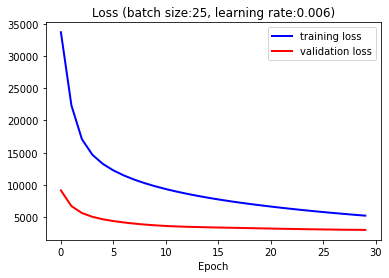

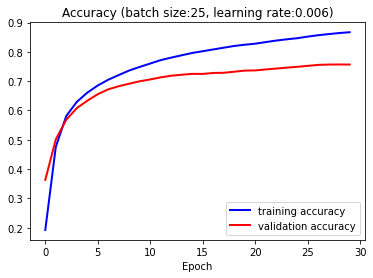

Batch size 25, learning rate 0.0006
itr: 00 	 loss: 38293.60 	 acc : 0.07
itr: 14 	 loss: 18675.26 	 acc : 0.61
itr: 28 	 loss: 13299.08 	 acc : 0.69
Validation loss, accuracy: 4571.28211089144, 0.6711111111111111


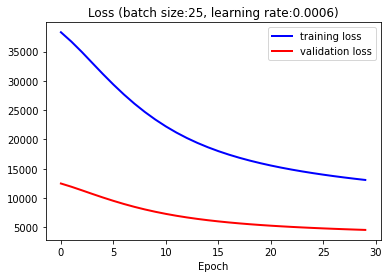

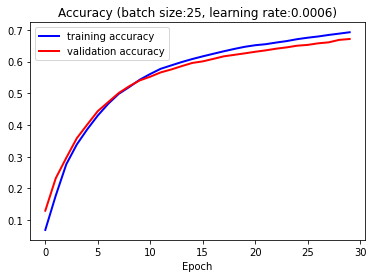

In [6]:
# Please put your code for Q3.2 here
# YOUR CODE HERE

for batch_size in (25, ):
    for learning_rate in (6e-2, 6e-3, 6e-4):
        print(f"Batch size {batch_size}, learning rate {learning_rate}")

        batches = get_random_batches(train_x, train_y, batch_size)
        num_batches = len(batches)

        params = {}

        # initialize layers (named "layer1" and "output") here
        # YOUR CODE HERE
        initialize_weights(in_size=train_x.shape[1],
                           out_size=hidden_size,
                           params=params,
                           name="layer1")
        initialize_weights(in_size=hidden_size,
                           out_size=train_y.shape[1],
                           params=params,
                           name="output")

        # with default settings, you should get loss < 150 and accuracy > 80%
        t_losses = []
        t_accuracies = []
        v_losses = []
        v_accuracies = []
        for itr in range(max_iters):
            total_loss = 0
            total_acc = 0
            for i, (xb, yb) in enumerate(batches):

                # training loop can be exactly the same as q2!
                # YOUR CODE HERE
                total_loss, total_acc = network_step(
                    x_batch=xb,
                    y_batch=yb,
                    params=params,
                    total_loss=total_loss,
                    avg_acc=total_acc,
                    learning_rate=learning_rate,
                    len_x_full=train_x.shape[0],
                )
                # if i % 10 == 0:
                #     print(f"Epoch {itr+1:02d}, Batch {i+1:03d}/{num_batches}")

            t_losses.append(total_loss)
            t_accuracies.append(total_acc)

            valid_hidden = forward(X=valid_x, params=params, name='layer1', activation=sigmoid)
            valid_probs = forward(X=valid_hidden, params=params, name='output', activation=softmax)
            valid_loss, valid_acc = compute_loss_and_acc(valid_y, valid_probs)

            v_losses.append(valid_loss)
            v_accuracies.append(valid_acc)

            if itr % 14 == 0:
                print("itr: {:02d} \t loss: {:.2f} \t acc : {:.2f}".format(itr, total_loss, total_acc))

        # run on validation set and report accuracy! should be above 75%
        # YOUR CODE HERE

        print(f'Validation loss, accuracy: {v_losses[-1]}, {v_accuracies[-1]}')

        from matplotlib import pyplot
        pyplot.plot(t_losses, "b", lw=2, label="training loss")
        pyplot.plot(v_losses, "r", lw=2, label="validation loss")
        pyplot.xlabel("Epoch")
        pyplot.title(f"Loss (batch size:{batch_size}, learning rate:{learning_rate})")
        pyplot.legend()
        pyplot.show()

        pyplot.plot(t_accuracies, "b", lw=2, label="training accuracy")
        pyplot.plot(v_accuracies, "r", lw=2, label="validation accuracy")
        pyplot.xlabel("Epoch")
        pyplot.title(f"Accuracy (batch size:{batch_size}, learning rate:{learning_rate})")
        pyplot.legend()
        pyplot.show()

### Q3.3 (2 points Code+WriteUp)
Visualize the first layer weights that your network learned. Compare these to the network weights immediately after initialization. Include both visualizations in your writeup. Comment on the learned weights. Do you notice any patterns?

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

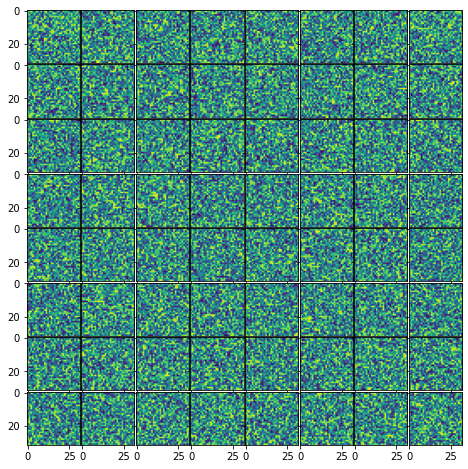

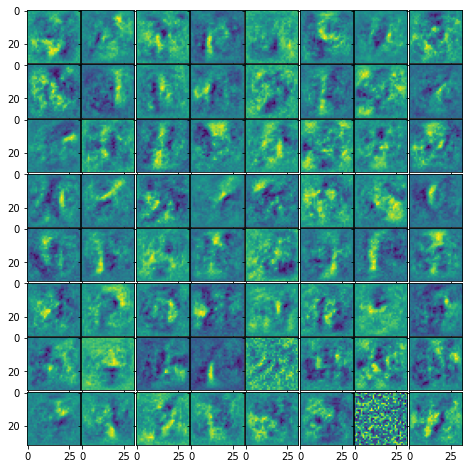

In [21]:
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Please put your code for Q3.3 here
# YOUR CODE HERE

train_data = scipy.io.loadmat('data/nist36_train.mat')
valid_data = scipy.io.loadmat('data/nist36_valid.mat')

train_x, train_y = train_data['train_data'], train_data['train_labels']
valid_x, valid_y = valid_data['valid_data'], valid_data['valid_labels']

hidden_size = 64
params = {}

initialize_weights(in_size=train_x.shape[1],
                   out_size=hidden_size,
                   params=params,
                   name="layer1")
starter_W = params['Wlayer1'].T
final_params = pickle.load(open('q3_weights.pickle','rb'))
final_W = final_params['Wlayer1'].T

for group, name in zip([starter_W, final_W], ["initialization", "learned"]):
    figure = plt.figure(figsize=(8, 8))
    grid = ImageGrid(figure, 111, nrows_ncols=(8, 8), axes_pad=0.02)
    for axis, weights in zip(grid, group):
        axis.imshow(weights.reshape((32, 32)))
    plt.savefig(f"{name}_weights.png")


### Q3.4 (3 points Code+WriteUp)
To visualize the deeper second layer we use the following method:

Given $y_1$ (size 64) as the output of the first layer and $y_2$ (size 36) as the output of the second layer. We will take a [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) for any number $i$ in range $[0, 36)$ and multiply it with the transposed weight matrix of layer 2, $W_2^T$. Similarly multiply the output with $W_1^T$ to get back an array of the size of the input image (1024). Reshape and visualize the result.

For these values of $i$, additionally include the image in the validation set for which $y_2(i)$ attains it's maximum value.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

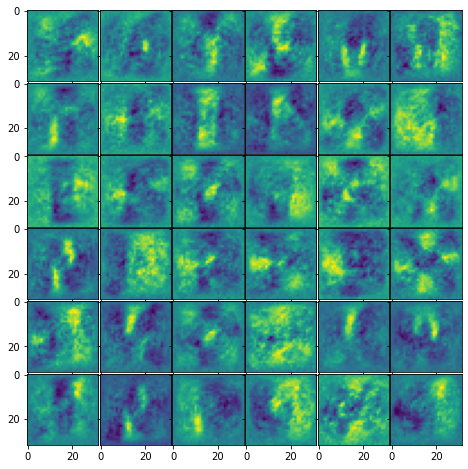

In [23]:
# Please put your code for Q3.4 here

import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# YOUR CODE HERE

hidden_size = 64
params = {}

params = pickle.load(open('q3_weights.pickle','rb'))
W1 = params['Wlayer1'].T
Wout = params['Woutput'].T

figure = plt.figure(figsize=(8, 8))
grid = ImageGrid(figure, 111, nrows_ncols=(6, 6), axes_pad=0.02)
for axis, Wout_weights in zip(grid, Wout):
    viz_weights = Wout_weights @ W1
    axis.imshow(viz_weights.reshape((32, 32)))
plt.savefig(f"final_2ndlayer_weights.png")


### Q3.5 (4 points Code+WriteUp)
Visualize the confusion matrix for your best model for the test set. Comment on the top few pairs of classes that are most commonly confused.

<font color="red">**Please include the write up answer and the screenshot of code to theory.ipynb**</font>

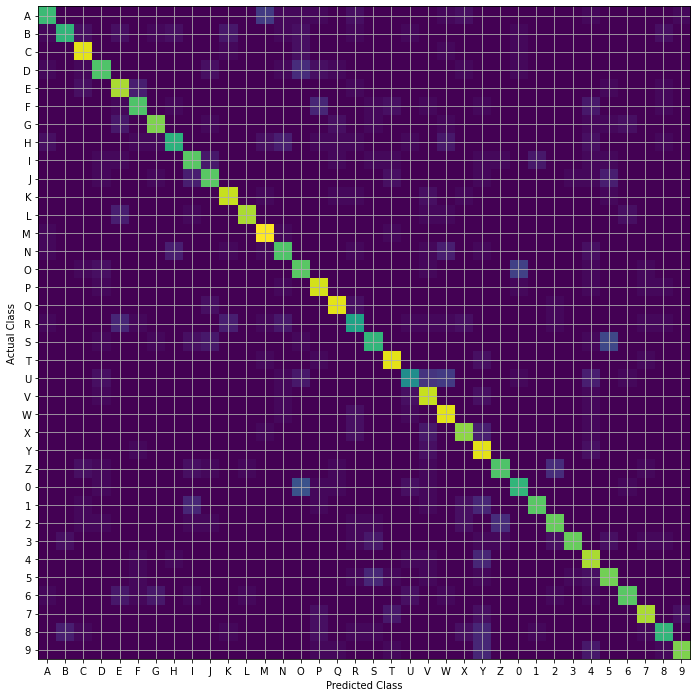

In [33]:
import matplotlib.pyplot as plt
confusion_matrix = np.zeros((train_y.shape[1],train_y.shape[1]), dtype=int)
# YOUR CODE HERE

def best_idx(params, vector):
    y1 = forward(vector.reshape((1, 32*32)), params, "layer1", sigmoid)
    probs = forward(y1, params, "output", softmax)
    return np.argmax(probs)

test_data = scipy.io.loadmat('data/nist36_test.mat')
test_x, test_y = test_data['test_data'], test_data['test_labels']
params = pickle.load(open('q3_weights.pickle','rb'))

for x, y in zip(test_x, test_y):
    guess = best_idx(params, x)
    actual = np.argmax(y)
    confusion_matrix[actual, guess] += 1

import string
figure = plt.figure(figsize=(12, 12))
plt.imshow(confusion_matrix,interpolation='nearest')
plt.grid(True)
plt.ylabel("Actual Class")
plt.xlabel("Predicted Class")
plt.xticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.yticks(np.arange(36),string.ascii_uppercase[:26] + ''.join([str(_) for _ in range(10)]))
plt.savefig("confusion_matrix.png")